# **MODELADO PARA LA PRECIPITACIÓN EN EL ZÓCALO DE PUEBLA**



Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
data=pd.read_csv('MXN00021035.csv')

In [4]:
pre=data.iloc[:,6]  # Keep the 7th column (the one with the date)
date=data.iloc[:,5] # Keep the 6th column (the one with the temperature)
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # From 195210 to 1952/10 
date = pd.to_datetime(date, format='%Y/%m')# Convert the date column to datetime

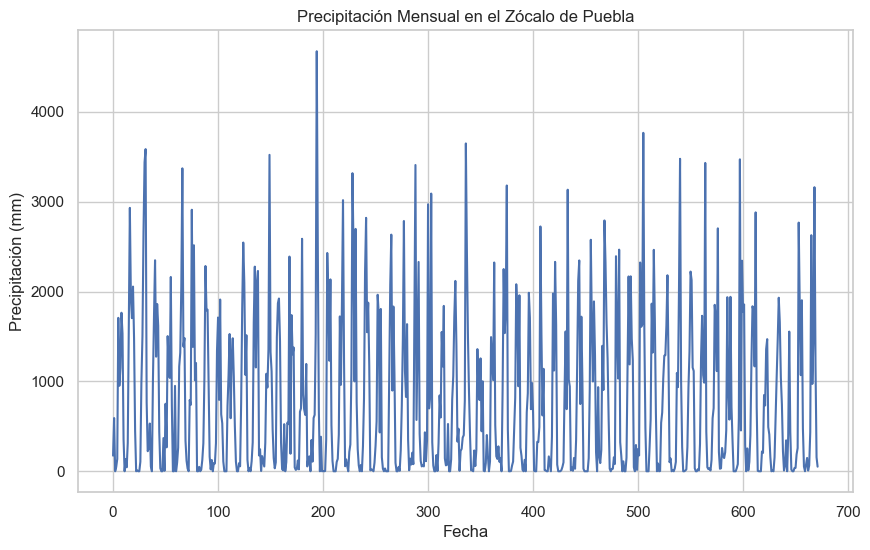

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en el Zócalo de Puebla")
plt.grid(True)
plt.show()

# **TRANSFORMACIÓN**

In [7]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Crear y ajustar el transformador Yeo-Johnson
pt = PowerTransformer(method='box-cox', standardize=True)
ypre = pt.fit_transform(pre.values.reshape(-1, 1))

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [10]:
# Obtener el valor lambda estimado
print("Lambda estimado:", pt.lambdas_)

Lambda estimado: [0.23801569]


se usa un lambda de 0.23  
depende de compu

In [11]:
# Aplicar la transformación inversa
preo = pt.inverse_transform(ypre)

print("Original:")
print(pre.values.reshape(-1, 1))


Original:
[[ 174]
 [ 592]
 [   0]
 [  47]
 [ 137]
 [1707]
 [ 951]
 [1150]
 [1764]
 [1532]
 [ 354]
 [   0]
 [ 135]
 [  44]
 [ 315]
 [1638]
 [2931]
 [1913]
 [1704]
 [2055]
 [1478]
 [ 451]
 [   0]
 [  10]
 [   0]
 [   0]
 [ 106]
 [ 992]
 [1505]
 [2663]
 [3438]
 [3585]
 [ 766]
 [ 223]
 [ 254]
 [ 531]
 [  55]
 [   0]
 [1030]
 [1730]
 [2348]
 [1275]
 [1861]
 [1619]
 [ 439]
 [  34]
 [   0]
 [   0]
 [ 369]
 [   5]
 [ 751]
 [ 266]
 [1504]
 [1177]
 [1039]
 [2162]
 [ 729]
 [   0]
 [   0]
 [ 950]
 [   0]
 [  93]
 [ 262]
 [1165]
 [1319]
 [2059]
 [3371]
 [1388]
 [1483]
 [ 338]
 [ 117]
 [  30]
 [   0]
 [ 792]
 [ 739]
 [2910]
 [1384]
 [2515]
 [1013]
 [1205]
 [   0]
 [   0]
 [  49]
 [   0]
 [  18]
 [ 126]
 [ 312]
 [1038]
 [2284]
 [1790]
 [1798]
 [ 983]
 [ 163]
 [  21]
 [ 125]
 [   0]
 [  91]
 [  86]
 [ 312]
 [1344]
 [1711]
 [ 794]
 [1911]
 [ 633]
 [ 534]
 [ 109]
 [   0]
 [   0]
 [   0]
 [ 725]
 [1067]
 [1527]
 [ 590]
 [1288]
 [1480]
 [1053]
 [ 503]
 [ 107]
 [   0]
 [   0]
 [  90]
 [  55]
 [ 763]
 [1822

In [12]:
print("\nReconstruido (inverso):")
print(preo)


Reconstruido (inverso):
[[1.740e+02]
 [5.920e+02]
 [0.000e+00]
 [4.700e+01]
 [1.370e+02]
 [1.707e+03]
 [9.510e+02]
 [1.150e+03]
 [1.764e+03]
 [1.532e+03]
 [3.540e+02]
 [0.000e+00]
 [1.350e+02]
 [4.400e+01]
 [3.150e+02]
 [1.638e+03]
 [2.931e+03]
 [1.913e+03]
 [1.704e+03]
 [2.055e+03]
 [1.478e+03]
 [4.510e+02]
 [0.000e+00]
 [1.000e+01]
 [0.000e+00]
 [0.000e+00]
 [1.060e+02]
 [9.920e+02]
 [1.505e+03]
 [2.663e+03]
 [3.438e+03]
 [3.585e+03]
 [7.660e+02]
 [2.230e+02]
 [2.540e+02]
 [5.310e+02]
 [5.500e+01]
 [0.000e+00]
 [1.030e+03]
 [1.730e+03]
 [2.348e+03]
 [1.275e+03]
 [1.861e+03]
 [1.619e+03]
 [4.390e+02]
 [3.400e+01]
 [0.000e+00]
 [0.000e+00]
 [3.690e+02]
 [5.000e+00]
 [7.510e+02]
 [2.660e+02]
 [1.504e+03]
 [1.177e+03]
 [1.039e+03]
 [2.162e+03]
 [7.290e+02]
 [0.000e+00]
 [0.000e+00]
 [9.500e+02]
 [0.000e+00]
 [9.300e+01]
 [2.620e+02]
 [1.165e+03]
 [1.319e+03]
 [2.059e+03]
 [3.371e+03]
 [1.388e+03]
 [1.483e+03]
 [3.380e+02]
 [1.170e+02]
 [3.000e+01]
 [0.000e+00]
 [7.920e+02]
 [7.390e+02]


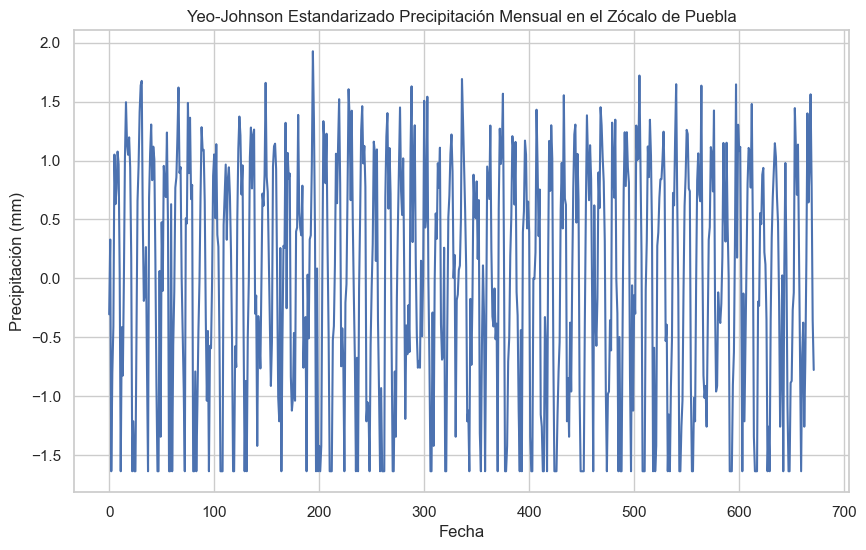

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(ypre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Yeo-Johnson Estandarizado Precipitación Mensual en el Zócalo de Puebla")
plt.grid(True)
plt.show()

# **ESTACIONARIEDAD**

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfuller(ypre)

(-7.092601622125731,
 4.3709379742257517e-10,
 17,
 654,
 {'1%': -3.440388459298194,
  '5%': -2.8659694611921034,
  '10%': -2.569128861019929},
 1158.2583743431305)

In [16]:
estacionariedad = adfuller(ypre)

if estacionariedad[1] < 0.05:
    print("La serie es estacionaria", estacionariedad[1])

La serie es estacionaria 4.3709379742257517e-10


## **AUTOCORRELACIONES**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
from fac_y_facps_significativas import *    # Este es el archivo que se usa para el curso

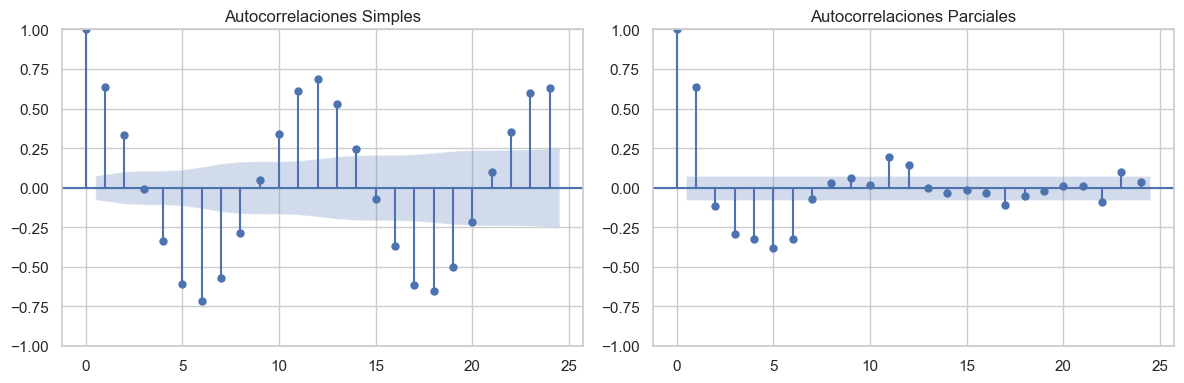

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(ypre, lags=24, ax=axs[0])
# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(ypre, lags=24, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')

plt.tight_layout()
plt.show()


In [20]:
fac = FAC(len(ypre), acf(ypre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: 0.6342847387425632
r2: 0.3322009206680224
r4: -0.33860126674758995
r5: -0.6115854475702546
r6: -0.7190648308075895
r7: -0.5691325786877741
r8: -0.28393632131685287
r10: 0.34122939443275213
r11: 0.6130880086405508
r12: 0.6874989600822966
r13: 0.5275914269967104
r14: 0.2414727291839963
r16: -0.3719149280712861
r17: -0.6128107061643205
r18: -0.6535427016550234
r19: -0.5005469564429801
r22: 0.3535761456770601
r23: 0.5989723862318999
r24: 0.627804531714153


In [21]:
facp = FACP(len(ypre), pacf(ypre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.6352300215126712
rho 2: -0.11789881064955397
rho 3: -0.29409422369935306
rho 4: -0.3284863556530342
rho 5: -0.3857613954555211
rho 6: -0.3320625526317802
rho 11: 0.20313139379301667
rho 12: 0.15629407166132236
rho 17: -0.12206771400339961
rho 22: -0.08796950273764102
rho 23: 0.10905126340713656


## **MODELADO**

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [91]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -655.019
Date:                              Tue, 22 Apr 2025   AIC                           1318.039
Time:                                      18:15:50   BIC                           1336.080
Sample:                                           0   HQIC                          1325.026
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3193      0.034      9.500      0.000       0.253       0.385
ar.S.L12       0.9216      0.020     46.228      0.000       0.883       0.961
ma.S.L12      -0.6034      0.041    -14.603      0.000      -0.684      -0.522
sigma2         0.4060      0.021     19.147      0.000       0.364       0.448
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                21.53
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.41
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

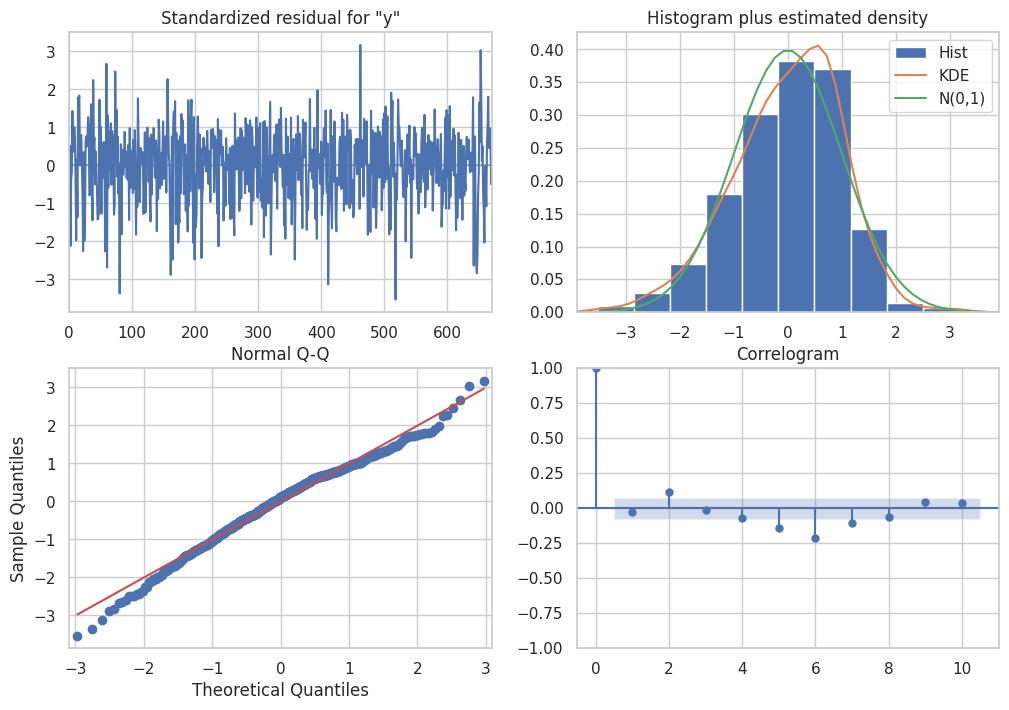

In [92]:
diagnostic = modelo.plot_diagnostics(figsize=(12, 8))
plt.show()

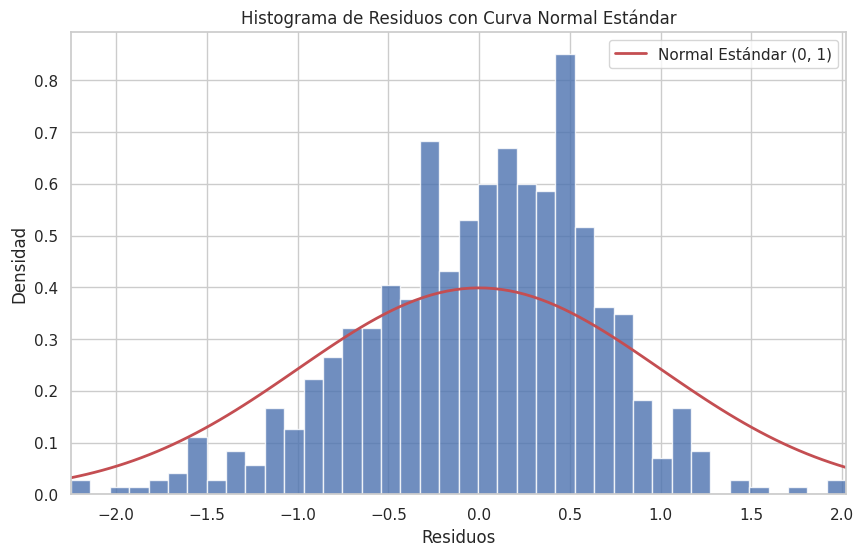

In [103]:
# Importar la función para la distribución normal
from scipy.stats import norm
import numpy as np

# Graficar el histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(modelo.resid, bins=40, density=True, alpha=0.8, edgecolor='white')

# Generar valores para la curva normal estándar
x = np.linspace(modelo.resid.min(), modelo.resid.max(), 100)
normal_pdf = norm.pdf(x, loc=0, scale=1)  # Media 0, desviación estándar 1

# Graficar la curva normal estándar
plt.plot(x, normal_pdf, 'r-', lw=2, label='Normal Estándar (0, 1)')

# Etiquetas y leyenda
plt.title("Histograma de Residuos con Curva Normal Estándar")
plt.xlabel("Residuos")
plt.ylabel("Densidad")
plt.xlim(modelo.resid.min(), modelo.resid.max())
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **Ul mejor modelo SARIMA**

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1311.963, Time=2.54 sec  
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1911.053, Time=0.02 sec  
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1407.341, Time=0.23 sec  
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1529.166, Time=0.31 sec  
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1909.053, Time=0.01 sec  
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1417.826, Time=2.22 sec  
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1349.481, Time=1.62 sec  
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=1301.569, Time=3.69 sec  
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=1322.064, Time=3.47 sec  
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=1314.797, Time=3.97 sec  
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1308.530, Time=4.63 sec  
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=1334.931, Time=2.91 sec  
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=1318.488, Time=1.83 sec  
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=1339.323, Time=4.08 sec 
 ARIMA(2,0,3)(2,0,1)[12] intercept   : AIC=1221.204, Time=3.77 sec  
 ARIMA(2,0,3)(1,0,1)[12] intercept   : AIC=1214.311, Time=1.58 sec  
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=1207.983, Time=0.95 sec  
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=1211.165, Time=0.35 sec  
 ARIMA(2,0,3)(0,0,2)[12] intercept   : AIC=1209.179, Time=2.47 sec  
 ARIMA(2,0,3)(1,0,0)[12] intercept   : AIC=1207.567, Time=0.90 sec
 ARIMA(2,0,3)(2,0,0)[12] intercept   : AIC=1208.378, Time=3.35 sec
 ARIMA(1,0,3)(1,0,0)[12] intercept   : AIC=1376.094, Time=0.75 sec
 ARIMA(3,0,3)(1,0,0)[12] intercept   : AIC=1210.214, Time=1.67 sec
 ARIMA(2,0,4)(1,0,0)[12] intercept   : AIC=1209.398, Time=1.18 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=1411.187, Time=1.43 sec
 ARIMA(1,0,4)(1,0,0)[12] intercept   : AIC=1366.547, Time=1.58 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=1326.643, Time=1.68 sec
 ARIMA(3,0,4)(1,0,0)[12] intercept   : AIC=1211.408, Time=2.02 sec
 ARIMA(2,0,3)(1,0,0)[12]             : AIC=1205.567, Time=0.40 sec
 ARIMA(2,0,3)(0,0,0)[12]             : AIC=1209.165, Time=0.12 sec
 ARIMA(2,0,3)(2,0,0)[12]             : AIC=1206.378, Time=0.72 sec
 ARIMA(2,0,3)(1,0,1)[12]             : AIC=1200.512, Time=1.05 sec
 ARIMA(2,0,3)(0,0,1)[12]             : AIC=1205.983, Time=0.65 sec
 ARIMA(2,0,3)(2,0,1)[12]             : AIC=1202.486, Time=2.66 sec
 ARIMA(2,0,3)(1,0,2)[12]             : AIC=1202.484, Time=2.55 sec
 ARIMA(2,0,3)(0,0,2)[12]             : AIC=1207.179, Time=0.79 sec
 ARIMA(2,0,3)(2,0,2)[12]             : AIC=1204.463, Time=3.32 sec
 ARIMA(1,0,3)(1,0,1)[12]             : AIC=1296.044, Time=0.64 sec
 ARIMA(2,0,2)(1,0,1)[12]             : AIC=1203.823, Time=0.95 sec
 ARIMA(3,0,3)(1,0,1)[12]             : AIC=1203.281, Time=1.49 sec
 ARIMA(2,0,4)(1,0,1)[12]             : AIC=1202.477, Time=1.32 sec
 ARIMA(1,0,2)(1,0,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,0,4)(1,0,1)[12]             : AIC=1289.599, Time=0.76 sec
 ARIMA(3,0,2)(1,0,1)[12]             : AIC=1200.744, Time=1.13 sec
 ARIMA(3,0,4)(1,0,1)[12]             : AIC=1204.511, Time=1.27 sec

Best model:  ARIMA(2,0,3)(1,0,1)[12]          
Total fit time: 75.954 seconds

In [ ]:
import pmdarima as pm

In [ ]:
# Find the best SARIMA model
auto_sarima_model = pm.auto_arima(ypre, 
                                  seasonal=True, 
                                  m=12,  # Monthly data, so seasonality is 12
                                  stepwise=True, 
                                  suppress_warnings=True, 
                                  trace=True)

# Display the summary of the best model
auto_sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1311.963, Time=2.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1911.053, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1407.341, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1529.166, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1909.053, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1417.826, Time=2.22 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1349.481, Time=1.62 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=1301.569, Time=3.69 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=1322.064, Time=3.47 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=1314.797, Time=3.97 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1308.530, Time=4.63 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=1334.931, Time=2.91 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=1318.488, Time=1.83 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=1339.323, Time=4.08 sec
 ARIMA(2,0,3)(2,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -592.256
Date:                              Tue, 22 Apr 2025   AIC                           1200.512
Time:                                      14:56:43   BIC                           1236.594
Sample:                                           0   HQIC                          1214.486
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7104      0.008    203.184      0.000       1.694       1.727
ar.L2         -0.9855      0.009   -115.420      0.000      -1.002      -0.969
ma.L1         -1.4789      0.034    -43.320      0.000      -1.546      -1.412
ma.L2          0.7053      0.058     12.182      0.000       0.592       0.819
ma.L3          0.0654      0.037      1.776      0.076      -0.007       0.138
ar.S.L12       0.8782      0.089      9.880      0.000       0.704       1.052
ma.S.L12      -0.8071      0.108     -7.467      0.000      -1.019      -0.595
sigma2         0.3391      0.017     19.859      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  672
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -592.256
Date:                              Tue, 22 Apr 2025   AIC                           1200.512
Time:                                      14:59:11   BIC                           1236.594
Sample:                                           0   HQIC                          1214.486
                                              - 672                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7104      0.008    203.184      0.000       1.694       1.727
ar.L2         -0.9855      0.009   -115.420      0.000      -1.002      -0.969
ma.L1         -1.4789      0.034    -43.320      0.000      -1.546      -1.412
ma.L2          0.7053      0.058     12.182      0.000       0.592       0.819
ma.L3          0.0654      0.037      1.776      0.076      -0.007       0.138
ar.S.L12       0.8782      0.089      9.880      0.000       0.704       1.052
ma.S.L12      -0.8071      0.108     -7.467      0.000      -1.019      -0.595
sigma2         0.3391      0.017     19.859      0.000       0.306       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

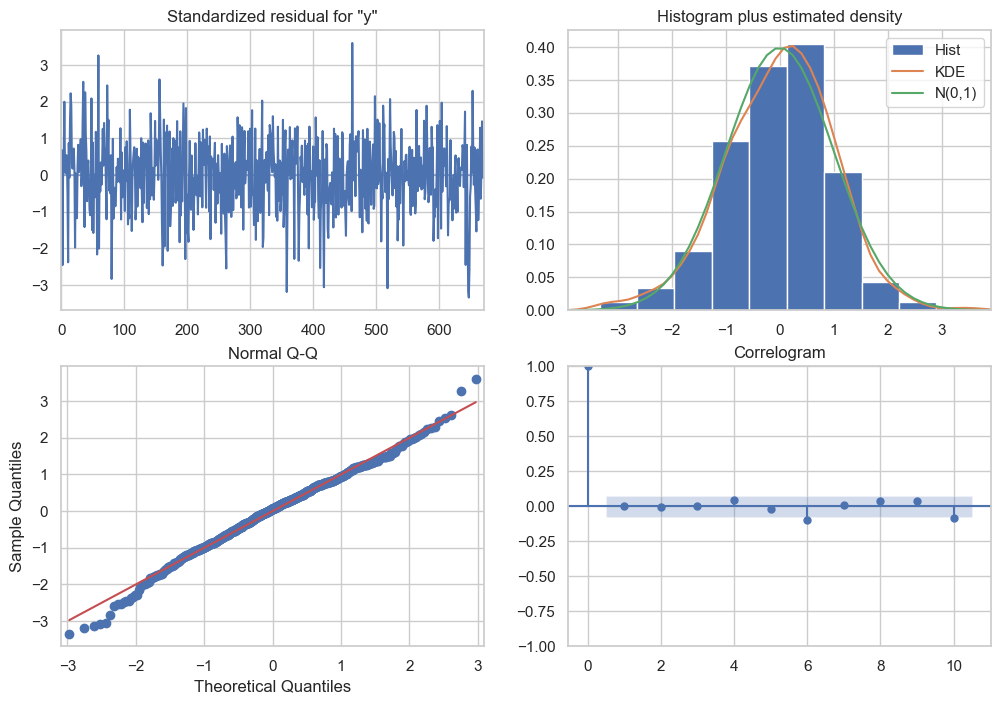

In [29]:
diagnostic = modelo.plot_diagnostics(figsize=(12, 8))
plt.show()

In [30]:
residuos = modelo.resid

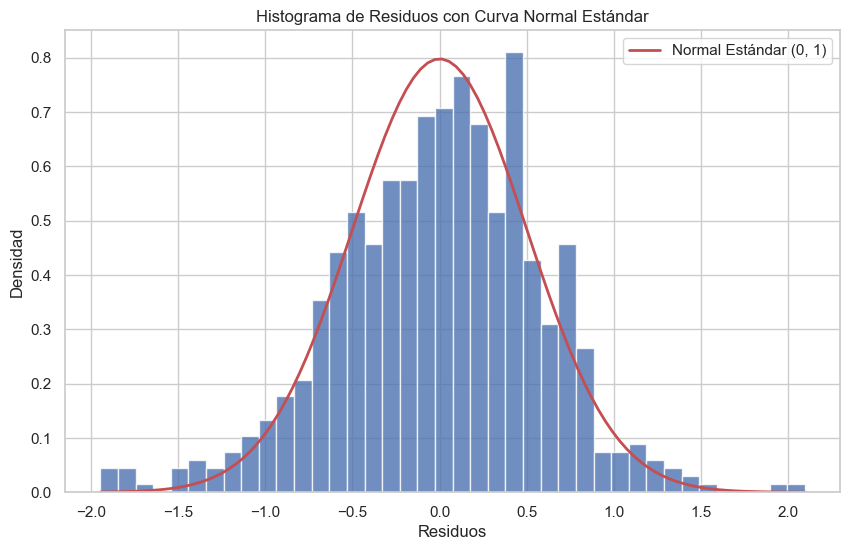

In [31]:
# Importar la función para la distribución normal
from scipy.stats import norm
import numpy as np


# Graficar KDE de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=40, density=True, alpha=0.8, edgecolor='white')

# Generar valores para la curva normal estándar
x = np.linspace(modelo.resid.min(), modelo.resid.max(), 100)
normal_pdf = norm.pdf(x, loc=0, scale=0.5)  # Media 0, desviación estándar 1

# Graficar la curva normal estándar
plt.plot(x, normal_pdf, 'r-', lw=2, label='Normal Estándar (0, 1)')

# Etiquetas y leyenda
plt.title("Histograma de Residuos con Curva Normal Estándar")
plt.xlabel("Residuos")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **FORECAST**

In [32]:
ypre

array([[-3.04269903e-01],
       [ 3.30105704e-01],
       [-1.63583355e+00],
       [-8.03028254e-01],
       [-4.07722913e-01],
       [ 1.05063639e+00],
       [ 6.30221288e-01],
       [ 7.60392908e-01],
       [ 1.07602745e+00],
       [ 9.68415796e-01],
       [ 4.08209065e-02],
       [-1.63583355e+00],
       [-4.13892396e-01],
       [-8.24115048e-01],
       [-2.00229030e-02],
       [ 1.01902095e+00],
       [ 1.49491570e+00],
       [ 1.13956887e+00],
       [ 1.04928224e+00],
       [ 1.19670779e+00],
       [ 9.41603541e-01],
       [ 1.72626346e-01],
       [-1.63583355e+00],
       [-1.21218689e+00],
       [-1.63583355e+00],
       [-1.63583355e+00],
       [-5.12233911e-01],
       [ 6.58630760e-01],
       [ 9.55101245e-01],
       [ 1.41187803e+00],
       [ 1.63735169e+00],
       [ 1.67563566e+00],
       [ 4.89027873e-01],
       [-1.90373101e-01],
       [-1.27836097e-01],
       [ 2.65921701e-01],
       [-7.51331900e-01],
       [-1.63583355e+00],
       [ 6.8

In [33]:
# Pronóstico para 12 meses hacia el futuro
forecast = modelo.forecast(steps=12)

In [34]:
# Obtener pronóstico con intervalos
pred = modelo.get_forecast(steps=12)

In [35]:
# Media pronosticada
forecast_mean = pred.predicted_mean
forecast_mean

array([-0.94461724, -0.90616886, -0.82132534, -0.43711095,  0.20920137,
        0.76886687,  0.92435963,  0.96886022,  0.82134122,  0.2614053 ,
       -0.43572131, -0.88243069])

In [36]:
# Intervalos de confianza
int_conf = pred.conf_int()
int_conf

array([[-2.08590934,  0.19667486],
       [-2.07764587,  0.26530815],
       [-2.00023392,  0.35758323],
       [-1.61670922,  0.74248732],
       [-0.97198666,  1.3903894 ],
       [-0.42113048,  1.95886422],
       [-0.28021401,  2.12893327],
       [-0.24866455,  2.186385  ],
       [-0.40196733,  2.04464976],
       [-0.96223935,  1.48504995],
       [-1.66125622,  0.7898136 ],
       [-2.11647122,  0.35160984]])

In [37]:
forecast_mean.reshape(-1, 1)

array([[-0.94461724],
       [-0.90616886],
       [-0.82132534],
       [-0.43711095],
       [ 0.20920137],
       [ 0.76886687],
       [ 0.92435963],
       [ 0.96886022],
       [ 0.82134122],
       [ 0.2614053 ],
       [-0.43572131],
       [-0.88243069]])

In [38]:
forecast_real = pt.inverse_transform(forecast_mean.reshape(-1, 1))

In [39]:
# get the lower and upper bounds
lower_bound_real = pt.inverse_transform(int_conf[:, 0].reshape(-1, 1))
upper_bound_real = pt.inverse_transform(int_conf[:, 1].reshape(-1, 1))

In [40]:
lower_bound_real

array([[-2.03016501e+00],
       [-2.00297435e+00],
       [-1.73843219e+00],
       [ 1.54282620e-01],
       [ 2.67680416e+01],
       [ 1.32681826e+02],
       [ 1.83591752e+02],
       [ 1.96772569e+02],
       [ 1.38885956e+02],
       [ 2.77165896e+01],
       [-1.81629143e-01],
       [-2.12915489e+00]])

In [41]:
upper_bound_real

array([[ 470.67809435],
       [ 530.44099702],
       [ 619.683813  ],
       [1120.89999497],
       [2596.79393278],
       [4826.77021179],
       [5715.27629577],
       [6041.90193533],
       [5260.65702335],
       [2898.12771488],
       [1199.05906009],
       [ 613.58352276]])

In [42]:
# Generate forecast dates and plot forecast series
forecast_index = pd.date_range(start=pre.index[-2], periods=13, freq='ME')[1:]

In [43]:
forecast_index

DatetimeIndex(['2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31',
               '2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31',
               '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30'],
              dtype='datetime64[ns]', freq='ME')

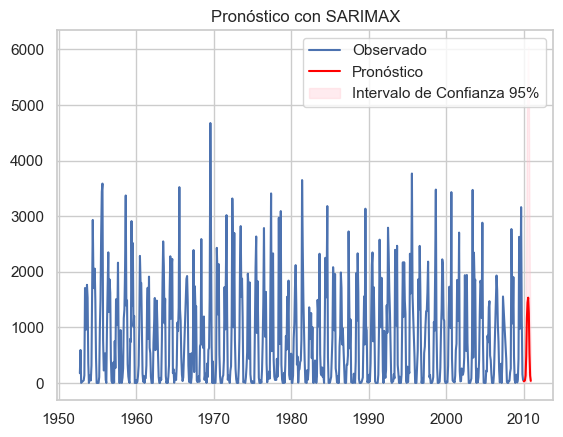

In [44]:
# Serie original
plt.plot(pre, label='Observado')

# Pronóstico
plt.plot(forecast_index, forecast_real, label='Pronóstico', color='red')    # Pronóstico en rojo

# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color='pink', alpha=0.3, label='Intervalo de Confianza 95%')

plt.legend()
plt.title('Pronóstico con SARIMAX') 
plt.show()

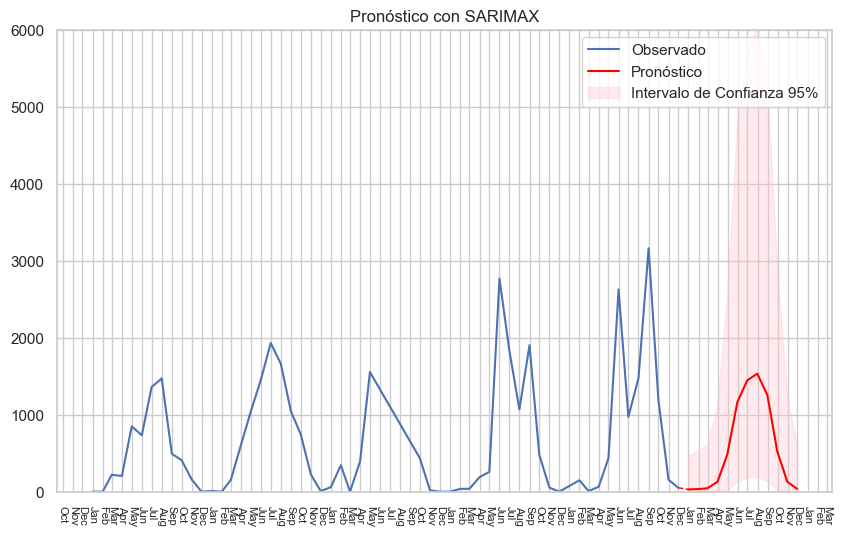

In [53]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre[pre.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, forecast_real, label='Pronóstico', color='red')

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = obs.index[-1]
last_obs_value = obs.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast_real[0, 0]
plt.plot([last_obs_date, first_fc_date], [last_obs_value, first_fc_value], color='red', linestyle='--', linewidth=1)

# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color='pink', alpha=0.3, label='Intervalo de Confianza 95%')

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico con SARIMAX')
plt.ylim(0, 6000)
plt.grid(True)
plt.show()